In [1]:
%run ../talktools.py

<div class="alert alert-info">sklearn is not built for deep/complex networks such as required in covnets (as we'll see later on). We must go to specialized software (and potentially specialized hardware)</div>


# Deep Learning Frameworks

Almost all frameworks written in low-level C++/C with Python (or other scripting bindings)

### Low-level frameworks

   - Tensorflow (Google) Nov 2015. See https://www.tensorflow.org/api_docs/python/tf
   - Theano
   - Caffe (Berkeley)
   - Torch (Lua)
   - pytorch (Python). https://pytorch.org/docs/stable/index.html
   - CNTK (Microsoft)
   - Chainer
   - PaddlePaddle (Baidu) Aug 2016
   
### High level frameworks (Python)

   - Keras (atop Tensorflow, Theano) - https://www.tensorflow.org/api_docs/python/tf/keras
   - TFLearn 
   - nolearn
   - SkFlow (part of tensorflow)
   - [Lasagne](http://lasagne.readthedocs.io/en/latest/index.html) (atop Theano)
   
<img src="https://pbs.twimg.com/media/DX0lfBNU8AEs8KG.png:large" width="75%">
Source: https://twitter.com/fchollet/status/971863128341323776

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">TensorFlow is the platform of choice for deep learning in the research community. These are deep learning framework mentions on arXiv over the past 3 months <img src="https://pbs.twimg.com/media/DXy_uc0VAAAIhKG.jpg:small">

&mdash; François Chollet (@fchollet) <a href="https://twitter.com/fchollet/status/971863128341323776?ref_src=twsrc%5Etfw">March 8, 2018</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


see also: https://github.com/mbadry1/Top-Deep-Learning

# Keras


"Use Keras if you need a deep learning library that:

Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
Supports both convolutional networks and recurrent networks, as well as combinations of the two.
Runs seamlessly on CPU and GPU."

-- keras.io

Let's load up the California housing data as in the previous notebook.

In [2]:
import math

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn import datasets
from sklearn.preprocessing import StandardScaler  

cal_data = datasets.fetch_california_housing()
X = cal_data['data']   # 8 features 
Y = cal_data['target'] # response (median house price)

half = math.floor(len(Y)/2)
train_X = X[:half]
train_Y = Y[:half]
test_X = X[half:]
test_Y = Y[half:]


scaler = StandardScaler()  

# Don't cheat - fit only on training data
scaler.fit(train_X)  
train_X = scaler.transform(train_X)  

# apply same transformation to test data
test_X = scaler.transform(test_X)

In [3]:
test_Y

array([3.356, 2.66 , 2.882, ..., 0.923, 0.847, 0.894])

In [4]:
num_input_features = train_X.shape[1]
print(f'number of input features = {num_input_features}')

number of input features = 8


In [27]:
import datetime, os

import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import tensorflow as tf

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Print keras version
print(tensorflow.keras.__version__)

from tensorflow import keras
print(f"backend={keras.backend.backend()}")

2.2.4-tf
backend=tensorflow


In [6]:
def nn_clf():
    model = Sequential()
    model.add(Dense(32, input_shape=(num_input_features,), 
                      activation="relu", kernel_initializer='random_uniform'))
    model.add(Dense(32,  activation="relu", kernel_initializer='random_uniform'))
    model.add(Dense(10,  activation="relu", kernel_initializer='random_uniform'))
    model.add(Dense(1, activation="linear", kernel_initializer='random_uniform'))
    model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae',"mse"])
    return model

In [7]:
model = nn_clf()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,685
Trainable params: 1,685
Non-trainable params: 0
_________________________________________________________________


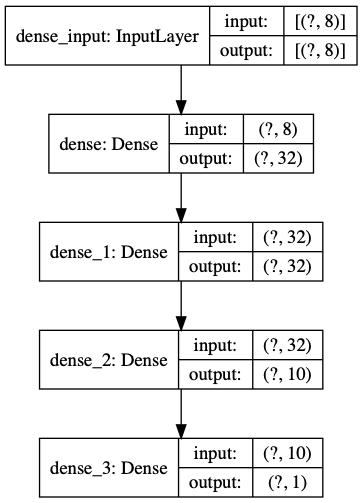

In [8]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

from IPython.display import Image
Image("model_plot.png")

In [9]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold

clf = KerasRegressor(build_fn=nn_clf, batch_size=32, epochs=50)
clf.fit(train_X, train_Y)

Using Theano backend.
W0413 14:23:52.207141 4469925312 deprecation.py:323] From /Users/jbloom/anaconda3/envs/deepCR/lib/python3.6/site-packages/tensorflow_core/python/keras/optimizer_v2/optimizer_v2.py:460: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.


Train on 10320 samples
Epoch 1/50
10320/10320 [==============================] - 0s 46us/sample - loss: 1.6927 - mae: 0.8902 - mse: 1.6927
Epoch 2/50
10320/10320 [==============================] - 0s 33us/sample - loss: 0.4393 - mae: 0.4730 - mse: 0.4393
Epoch 3/50
10320/10320 [==============================] - 0s 32us/sample - loss: 0.3952 - mae: 0.4499 - mse: 0.3952
Epoch 4/50
10320/10320 [==============================] - 0s 35us/sample - loss: 0.3784 - mae: 0.4391 - mse: 0.3784
Epoch 5/50
10320/10320 [==============================] - 0s 40us/sample - loss: 0.3703 - mae: 0.4356 - mse: 0.3703
Epoch 6/50
10320/10320 [==============================] - 0s 37us/sample - loss: 0.3638 - mae: 0.4295 - mse: 0.3638
Epoch 7/50
10320/10320 [==============================] - 0s 43us/sample - loss: 0.3566 - mae: 0.4237 - mse: 0.3566
Epoch 8/50
10320/10320 [==============================] - 0s 35us/sample - loss: 0.3506 - mae: 0.4191 - mse: 0.3506
Epoch 9/50
10320/10320 [=========================

MSE 0.5634681990886625


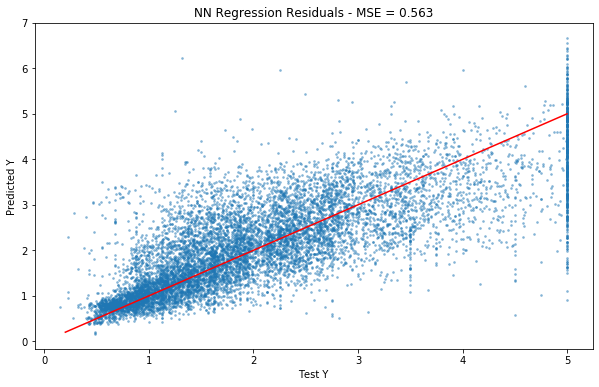

In [10]:
# how well did we do?
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_Y, clf.predict(test_X)) ; print("MSE",mse)

plt.figure(figsize=(10,6))
plt.title("NN Regression Residuals - MSE = %.3f" % mse)
plt.scatter(test_Y,clf.predict(test_X),alpha=0.4,s=3)
plt.xlabel("Test Y")
plt.ylabel("Predicted Y")
plt.plot([0.2,5],[0.2,5],c="r")

### A More Complete Example

We want to train and make some decisions of when to stop based on `validation` data. Ultimately, we'd like to see how well our model would do on truly new data (`test`).


In [11]:
train_percentage, valid_percentage, test_percentage = (0.90, 0.05, 0.05)

In [12]:
from sklearn.model_selection import train_test_split

rnd = np.random.RandomState(42)

# make an array with the indices of all the rows in the dataset
ind_arr = np.arange(X.shape[0])
rnd.shuffle(ind_arr)

train_ind, tmp = train_test_split(ind_arr, train_size=train_percentage, random_state=rnd)
valid_ind, test_ind = train_test_split(tmp, 
                                                          train_size=valid_percentage/(valid_percentage + test_percentage), 
                                                          random_state=rnd)

Let's make sure that we're getting all the indicies

In [13]:
assert np.all(np.array(sorted(list(train_ind) + list(valid_ind) + list(test_ind)))  == sorted(ind_arr))

In [14]:
train_ind.shape, test_ind.shape, valid_ind.shape

((18576,), (1032,), (1032,))

Now let's scale the inputs

In [15]:
scaler = StandardScaler()  

train_X = X[train_ind]
# Don't cheat - fit only on training data
scaler.fit(train_X)  
train_X = scaler.transform(train_X)  

# apply same transformation to test, validation data
test_X = scaler.transform(X[test_ind])
valid_X = scaler.transform(X[valid_ind])

train_y = Y[train_ind] ; test_y = Y[test_ind] ; valid_y = Y[valid_ind]

assert train_y.shape[0] == train_X.shape[0]
assert test_y.shape[0] == test_X.shape[0]
assert valid_y.shape[0] == valid_X.shape[0]

In [16]:
model = Sequential()
model.add(Dense(32, input_shape=(num_input_features,), 
                  activation="relu", kernel_initializer='random_uniform'))
model.add(Dense(32,  activation="relu", kernel_initializer='random_uniform'))
model.add(Dense(5,  activation="relu", kernel_initializer='random_uniform'))
model.add(Dense(1, activation="linear", kernel_initializer='random_uniform'))

The `Model.compile` method in `keras` has a number of input parameters:

```python
compile(optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)
```
Usually, you'll set the `optimizer`, `loss`, and `metrics`.

https://keras.io/models/model/

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 165       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 1,515
Trainable params: 1,515
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae',"mse"])

In [20]:
import datetime
import os

from tensorflow.keras.callbacks import EarlyStopping, CSVLogger, \
                                                ReduceLROnPlateau, ModelCheckpoint, TensorBoard

try:
    os.mkdir('nn_results')
except:
    pass

batch_size=64
num_epochs = 200

run_time_string = datetime.datetime.utcnow().isoformat(timespec='minutes')

# define path to save model
model_path = f'nn_results/datalab_nn_{run_time_string}.h5'
print(f"Training ... {model_path}")

# Tensorboard is a project which can ingest learning logs for interactive display...more on that later.
tb = TensorBoard(log_dir='nn_results', histogram_freq=0,
                 write_graph=True, 
                 write_grads=False, 
                 write_images=False, 
                 embeddings_freq=0, 
                 embeddings_layer_names=None, 
                 embeddings_metadata=None, embeddings_data=None)

reduce_lr = ReduceLROnPlateau(monitor='val_mse', factor=0.75,
                              patience=3, min_lr=1e-6, verbose=1, cooldown=0)

csv_logger = CSVLogger(f'nn_results/training_{run_time_string}.log')

earlystop = EarlyStopping(monitor='val_mse', min_delta=0.001, patience=10, \
                          verbose=1, mode='auto')

model_check = ModelCheckpoint(model_path,
        monitor='val_mse', 
        save_best_only=True, 
        mode='min',
        verbose=1)

Training ... nn_results/datalab_nn_2020-04-13T21:24.h5


The `Model.fit` method:

```python
fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1)
```

In [21]:
history = model.fit(x=train_X, y=train_y,
               epochs=num_epochs,
               validation_data=(valid_X, valid_y),
               verbose=1, shuffle=True,
               callbacks=[csv_logger, earlystop, model_check, tb])

Train on 18576 samples, validate on 1032 samples
Epoch 1/200
17440/18576 [===========================>..] - ETA: 0s - loss: 1.3444 - mae: 0.7947 - mse: 1.3444- ETA: 0s - loss: 1.6184 - mae: 0.8877 - mse: 1.6
Epoch 00001: val_mse improved from inf to 0.48867, saving model to nn_results/datalab_nn_2020-04-13T21:24.h5
18576/18576 [==============================] - 1s 54us/sample - loss: 1.2913 - mae: 0.7756 - mse: 1.2913 - val_loss: 0.4887 - val_mae: 0.4897 - val_mse: 0.4887
Epoch 2/200
17696/18576 [===========================>..] - ETA: 0s - loss: 0.4393 - mae: 0.4727 - mse: 0.4393
Epoch 00002: val_mse improved from 0.48867 to 0.44588, saving model to nn_results/datalab_nn_2020-04-13T21:24.h5
18576/18576 [==============================] - 1s 40us/sample - loss: 0.4363 - mae: 0.4714 - mse: 0.4363 - val_loss: 0.4459 - val_mae: 0.4680 - val_mse: 0.4459
Epoch 3/200
17696/18576 [===========================>..] - ETA: 0s - loss: 0.4171 - mae: 0.4594 - mse: 0.4171
Epoch 00003: val_mse improved 

Epoch 23/200
17632/18576 [===========================>..] - ETA: 0s - loss: 0.3077 - mae: 0.3861 - mse: 0.3077
Epoch 00023: val_mse improved from 0.32559 to 0.32082, saving model to nn_results/datalab_nn_2020-04-13T21:24.h5
18576/18576 [==============================] - 1s 44us/sample - loss: 0.3108 - mae: 0.3875 - mse: 0.3108 - val_loss: 0.3208 - val_mae: 0.3893 - val_mse: 0.3208
Epoch 24/200
18176/18576 [============================>.] - ETA: 0s - loss: 0.3102 - mae: 0.3855 - mse: 0.3102
Epoch 00024: val_mse did not improve from 0.32082
18576/18576 [==============================] - 1s 35us/sample - loss: 0.3107 - mae: 0.3859 - mse: 0.3107 - val_loss: 0.3497 - val_mae: 0.3957 - val_mse: 0.3497
Epoch 25/200
17472/18576 [===========================>..] - ETA: 0s - loss: 0.3065 - mae: 0.3842 - mse: 0.3065
Epoch 00025: val_mse improved from 0.32082 to 0.32002, saving model to nn_results/datalab_nn_2020-04-13T21:24.h5
18576/18576 [==============================] - 1s 40us/sample - loss: 0

Epoch 47/200
18048/18576 [============================>.] - ETA: 0s - loss: 0.2839 - mae: 0.3665 - mse: 0.2839
Epoch 00047: val_mse did not improve from 0.29941
18576/18576 [==============================] - 1s 33us/sample - loss: 0.2842 - mae: 0.3671 - mse: 0.2842 - val_loss: 0.3011 - val_mae: 0.3681 - val_mse: 0.3011
Epoch 48/200
17984/18576 [============================>.] - ETA: 0s - loss: 0.2842 - mae: 0.3662 - mse: 0.2842
Epoch 00048: val_mse improved from 0.29941 to 0.29722, saving model to nn_results/datalab_nn_2020-04-13T21:24.h5
18576/18576 [==============================] - 1s 37us/sample - loss: 0.2834 - mae: 0.3661 - mse: 0.2834 - val_loss: 0.2972 - val_mae: 0.3707 - val_mse: 0.2972
Epoch 49/200
18208/18576 [============================>.] - ETA: 0s - loss: 0.2834 - mae: 0.3666 - mse: 0.2834
Epoch 00049: val_mse did not improve from 0.29722
18576/18576 [==============================] - 1s 32us/sample - loss: 0.2822 - mae: 0.3660 - mse: 0.2822 - val_loss: 0.3008 - val_mae:

17760/18576 [===========================>..] - ETA: 0s - loss: 0.2669 - mae: 0.3535 - mse: 0.2669- ETA: 0s - loss: 0.2610 - mae: 0.3507 - mse: 0.2
Epoch 00071: val_mse did not improve from 0.28799
18576/18576 [==============================] - 1s 36us/sample - loss: 0.2674 - mae: 0.3537 - mse: 0.2674 - val_loss: 0.2929 - val_mae: 0.3612 - val_mse: 0.2929
Epoch 72/200
17632/18576 [===========================>..] - ETA: 0s - loss: 0.2676 - mae: 0.3535 - mse: 0.2676
Epoch 00072: val_mse did not improve from 0.28799
18576/18576 [==============================] - 1s 34us/sample - loss: 0.2666 - mae: 0.3529 - mse: 0.2666 - val_loss: 0.2913 - val_mae: 0.3603 - val_mse: 0.2913
Epoch 73/200
17696/18576 [===========================>..] - ETA: 0s - loss: 0.2651 - mae: 0.3520 - mse: 0.2651
Epoch 00073: val_mse did not improve from 0.28799
18576/18576 [==============================] - 1s 36us/sample - loss: 0.2662 - mae: 0.3523 - mse: 0.2662 - val_loss: 0.2917 - val_mae: 0.3734 - val_mse: 0.2917
E

17440/18576 [===========================>..] - ETA: 0s - loss: 0.2603 - mae: 0.3482 - mse: 0.2603
Epoch 00095: val_mse did not improve from 0.27847
18576/18576 [==============================] - 1s 36us/sample - loss: 0.2582 - mae: 0.3479 - mse: 0.2582 - val_loss: 0.2825 - val_mae: 0.3534 - val_mse: 0.2825
Epoch 00095: early stopping


In [28]:
!ls nn_results/

datalab_nn_2020-04-13T21:24.h5 training_2020-04-13T21:24.log
train                          validation


Let's look at the history of the training results:

In [30]:
lastest_log_file = !ls -t1 nn_results/training* | head -1
hist_df = pd.read_csv(lastest_log_file[0])
hist_df

,epoch,loss,mae,mse,val_loss,val_mae,val_mse
0,0,1.291273,0.775561,1.291273,0.488666,0.489736,0.488666
1,1,0.436323,0.471376,0.436323,0.445879,0.467988,0.445879
2,2,0.419747,0.460183,0.419747,0.431912,0.462585,0.431912
3,3,0.408976,0.454321,0.408976,0.430330,0.451637,0.430330
4,4,0.402392,0.449808,0.402392,0.421964,0.447850,0.421964
5,5,0.396124,0.446572,0.396124,0.408875,0.444478,0.408874
6,6,0.387597,0.441131,0.387597,0.404196,0.448766,0.404196
7,7,0.376733,0.433980,0.376734,0.389561,0.429216,0.389561
8,8,0.370977,0.428875,0.370977,0.384826,0.440268,0.384826
9,9,0.362055,0.422033,0.362055,0.368506,0.418332,0.368507


This is also available in the return value from `.fit`:

In [31]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

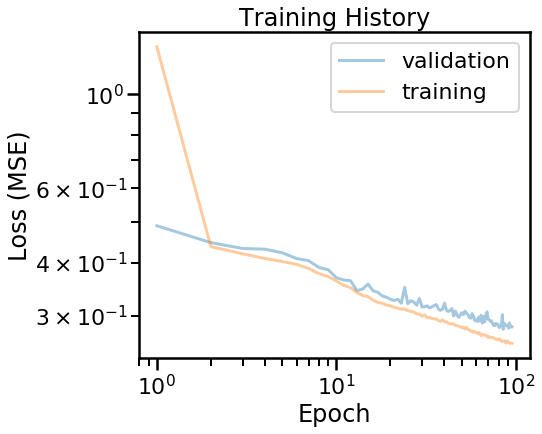

In [32]:
import seaborn as sns
sns.set_context("poster")
plt.figure(figsize=(7,6))
plt.title("Training History")
plt.plot(hist_df.index + 1,hist_df["val_mse"] ,alpha=0.4, label="validation")
plt.plot(hist_df.index + 1,hist_df["mse"] ,alpha=0.4, label="training")

plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.loglog()
plt.legend()

Take a look at the `tensorboard` notebook as well...

Let's take a look at the predictions on the test set

In [33]:
!ls nn_results

datalab_nn_2020-04-13T21:24.h5 training_2020-04-13T21:24.log
train                          validation


In [35]:
# reload the best model
from tensorflow.keras.models import load_model
import tensorflow as tf

model = load_model("nn_results/datalab_nn_2020-04-13T21:24.h5")

In [36]:
pred_y = model.predict(test_X)
pred_y

array([[1.7516166 ],
       [3.657685  ],
       [0.74946034],
       ...,
       [1.463017  ],
       [1.5492529 ],
       [1.321753  ]], dtype=float32)

MSE 0.28833728318905094


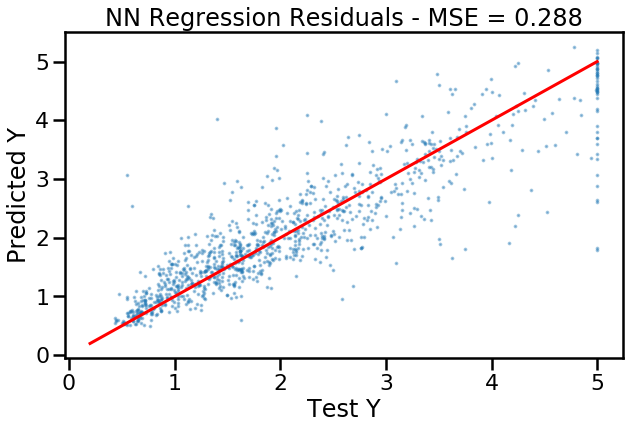

In [37]:
# how well did we do?
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, pred_y[:,0]); print("MSE",mse)

plt.figure(figsize=(10,6))
plt.title("NN Regression Residuals - MSE = %.3f" % mse)
plt.scatter(test_y,pred_y[:,0] ,alpha=0.4,s=3)
plt.xlabel("Test Y")
plt.ylabel("Predicted Y")
plt.plot([0.2,5],[0.2,5],c="r")

How did we do compared to the validation and training data?